In [9]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from statistics import mean 
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [10]:
FILE_PATH = 'data/exp1_main2.json'
all_entries = []
all_entries1 = []
all_entries2 = []

with open(FILE_PATH) as file:
    all_entries1 = json.loads(file.read(), strict=False)

FILE_PATH = 'data/exp1_main.json'
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries2.append(entry)
        e = entry['data']
        
all_entries = all_entries1+all_entries2        
len(all_entries1)

635

In [11]:
start = []
finish = []
for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']
        start.append(entry)
    else:
        condition = entry['data'][0]
        finish.append(entry)
print(len(start),len(finish))

def return_indices(user_order): #function that searches through the list of anagrams and returns the indices of the anagrams seen by the subject
    order = ['TEH', 'WYH', 'CPA', 'YSE', 'CPU','FNU', 'EEY', 'SNU', 'HTA', 'CNA', 'HTE', 'HWY', 'APC', 'EYS', 'PCU', 'NUF', 'YEE', 'UNS', 'AHT', 'ACN', 'WODR', 'DDEE', 'BLLE', 'STRO', 'PTIN', 'BTEL', 'CADR', 'FNDI', 'YLEL', 'CDOL','OWDR', 'EDDE', 'LBLE', 'TOSR', 'TIPN', 'TBLE', 'RADC', 'DIFN', 'LYLE','DOCL', 'VENGA','CLREK','PEOKR','OSIAS','GIATN','OUIPM','DONRO','PHNEO','ECELT','SCELA', 'EVANG', 'KLECR','KOERP','SAOSI','IGNAT','POUIM','OONRD','NPOHE','TELCE','ESALC', 'SADOWH','DOLRLA','RAODNM','SALYRA','WEIGTH','RDFUNE','LEETTR','CRABON','WIZRAD','BLLAET', 'HSOADW', 'RODLLA','MARNOD','AALRYS','IEGWHT','UEFNDR','RETLET','NCRBOA','ZIAWRD','EABLLT', 'CLEIMAT','JWAYALK','HAKMOCM','DURAELB','NAYUGHT','GLICAER','JLUMBED','EXPLIAN','GBRAAGE','JNOUREY', 'TCILAME','AYKAWLJ','CAMHOMK','EURADBL','AYUGNHT','CLAIGER','LUBMEJD','AXPLINE','BARAGGE','YUOEJRN']
    idx = []
    for i in range(len(user_order)):
        idx.append(order.index(user_order[i]))
    return idx

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    #print(a)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        
def return_length(anagrams): #function that takes a list and returns the length of each string in that list
    length = []    
    for element in anagrams: # go thru each anagram
        length.append(len(element)) #append length
    return length

1410 1230


In [12]:
#get data for each subject 
time_guess = [] 
actual_rt = []
aha = []
subject_id = []
anagram_id = []
give_up = []
anagram_length = []

sub = 0
bad = 0
quit = 0
for entry in finish: 
    sub = sub+1
    entry_data = entry['data']
    idx = return_indices((entry_data[0]['anagrams_seen'])) #get the indices of the anagrams seen by the subject
    anagrams_answers = entry_data[0]['anagrams_answers']
    an_length = return_length(anagrams_answers)
    
    anagram_length.append(an_length)
    anagram_id.append(idx)
    subject_id.append(sub*np.ones(5))
    counter = 3 #3 is first time quiz is given to subjects
    while '5' not in entry_data[counter]['responses']: #keep increasing counter everytime subject gets the quiz incorrectly
        counter = counter+2
    
    for j in range(5):
        counter = counter+3
        time_guess.append(entry_data[counter]['response'])

        counter = counter+1  
        rt = entry_data[counter]['rt']
        attempt = entry_data[counter]['responses'] 
        g = 0

        while anagrams_answers[j].lower() not in attempt.lower(): #keep incrementing until person gets correct answer or gives up
            if "next" in attempt.lower(): #break if person gave up
                quit = quit+1
                g = 1
                break
            else:                
                counter = counter+1
                attempt = entry_data[counter]['responses']
                rt = rt+entry_data[counter]['rt']  
        
        if (rt*0.001)/60 > 4.3: #remove all responses greater than max(mean_rt)+1.5*max(mean_std). 
            bad = bad+1
            g = 1
        
        give_up.append(g)
        actual_rt.append(rt) #append actual time to complete
        counter = counter+1    
        r = entry_data[counter]['responses'] #aha rating
        aha.append(int(r[6]))

print(bad, quit)

25 592


In [13]:
#data conversion, clean-up, and storage here
time_guess = np.hstack(np.asarray(time_guess, dtype='float64'))*(3/100)*(60) 
actual_rt = np.hstack(np.asarray(actual_rt, dtype='float64'))*0.001
aha = np.hstack(np.asarray(aha, dtype='float64')) 
subject_id = np.hstack(subject_id) 
anagram_id = np.hstack(anagram_id) 
anagram_length = np.hstack(anagram_length)
give_up = np.hstack(give_up) 
tpe = time_guess - actual_rt

indexes = [i for i,x in enumerate(give_up) if x == 0] #only get subjects who solved the anagram    

aha = aha[np.asarray(indexes)] 
time_guess = time_guess[np.asarray(indexes)] 
actual_rt = actual_rt[np.asarray(indexes)] 
tpe = tpe[np.asarray(indexes)]
subject_id = subject_id[np.asarray(indexes)]
anagram_length = anagram_length[np.asarray(indexes)]
anagram_id = anagram_id[np.asarray(indexes)]

print(np.max(actual_rt)/60)

4.1674


<AxesSubplot:xlabel='aha', ylabel='rt'>

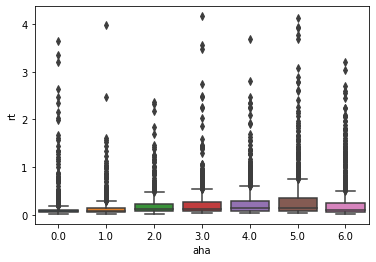

In [15]:
#do box plot and anova of all data for each aha rating
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'anagram_id': anagram_id, 'subject_id': subject_id,
    'tpe': tpe/60,
    'aha': aha,
    'estimate': time_guess/60,
     'rt':  actual_rt/60,
     'length':  anagram_length})

sns.boxplot(x=df["aha"], y=df["rt"])

#stats.f_oneway(df['tpe'][df['aha'] == 0], 
#             df['tpe'][df['aha'] == 1],
#             df['tpe'][df['aha'] == 2],
#             df['tpe'][df['aha'] == 3],
#             df['tpe'][df['aha'] == 4],
#             df['tpe'][df['aha'] == 5],
#             df['tpe'][df['aha'] == 6])

#results = ols('tpe ~ C(aha)', data=df).fit()
#results.summary()

In [16]:
import statsmodels.api as sm                                                                                               

df["group"] = 1                                                                                                            

vcf = {"subject_id": "0 + C(subject_id)", "anagram_id": "0 + C(anagram_id)"}                                                         
model = sm.MixedLM.from_formula("aha ~ estimate + rt + tpe + length", groups="group",                                                    
                                vc_formula=vcf, re_formula="0", data=df)                                                   
result = model.fit()  
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:            MixedLM Dependent Variable: aha        
No. Observations: 5539    Method:             REML       
No. Groups:       1       Scale:              2.3274     
Min. group size:  5539    Log-Likelihood:     -11200.9704
Max. group size:  5539    Converged:          Yes        
Mean group size:  5539.0                                 
---------------------------------------------------------
                Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       2.445    0.112 21.929 0.000  2.227  2.664
tpe             0.311    0.038  8.272 0.000  0.237  0.384
length          0.135    0.021  6.490 0.000  0.094  0.176
anagram_id Var  0.038    0.009                           
subject_id Var  2.026    0.077                           
=========================================================

"""

In [16]:
# interaction effect analysis
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula='aha ~ rt+estimate', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    aha   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     127.6
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           1.58e-54
Time:                        11:35:25   Log-Likelihood:                -9071.8
No. Observations:                4198   AIC:                         1.815e+04
Df Residuals:                    4195   BIC:                         1.817e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7234      0.045     60.561      0.000       2.635       2.812
rt             0.3154      0.107      2.936      0.003       0.105       0.526
estimate       0.5607      0.044     12.785      0.000       0.475       0.647
==============================================================================
Omnibus:                     5896.351   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.407
Skew:                          -0.072   Prob(JB):                     9.53e-61
Kurtosis:                       1.751   Cond. No.                         4.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 2.00e+00, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00, 3.00e+00, 2.00e+00, 2.00e+00, 0.00e+00, 4.00e+00,
        0.00e+00, 2.00e+00, 3.00e+00, 1.00e+00, 3.00e+00, 4.00e+00,
        4.00e+00, 1.10e+01, 1.30e+01, 1.30e+01, 1.40e+01, 2.60e+01,
        5.00e+01, 1.03e+03, 5.66e+02, 3.35e+02, 5.30e+02, 1.66e+02,
        1.62e+02, 3.18e+02, 1.58e+02, 7.30e+01, 

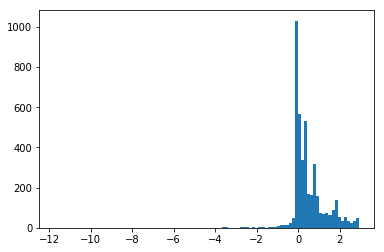

In [22]:
plt.hist(tpe/60, bins=100)

In [17]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
def plot_gamma_k():
    """
    k : the number of events for which you are waiting to occur.
    λ : the rate of events happening following Poisson dist.
    """
    x = np.linspace(0, 50, 1000)
    a = 1  # k = 1
    mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
    y1 = gamma.pdf(x, a)
    a = 5  # k = 5
    mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
    y2 = gamma.pdf(x, a)
    a = 10  # k = 15
    mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
    y3 = gamma.pdf(x, a)
    plt.title("PDF of Gamma Distribution")
    plt.xlabel("T")
    plt.ylabel("Probability Density")
    plt.plot(x, y1, label="alpha = 1", color='palegreen')
    plt.plot(x, y2, label="alpha = 5", color='yellowgreen')
    plt.plot(x, y3, label="alpha = 10", color='olivedrab')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right',
               borderaxespad=1, fontsize=12)
    plt.ylim([0, 0.40])
    plt.xlim([0, 20])
    plt.savefig('gamma_k.png')
    plt.clf()
def plot_gamma_lambda():
    """
    k : the number of events for which you are waiting to occur.
    𝛽 : the rate of events happening following Poisson dist.
    """
    a = 10  # k = 10
    x = np.linspace(0, 50, 1000)
    lambda_ = 1
    mean, var, skew, kurt = gamma.stats(a, scale=1/lambda_, moments='mvsk')
    y1 = gamma.pdf(x, a, scale=1/lambda_)
    lambda_ = 2
    mean, var, skew, kurt = gamma.stats(a, scale=1/lambda_, moments='mvsk')
    y2 = gamma.pdf(x, a, scale=1/lambda_)
    lambda_ = 3
    mean, var, skew, kurt = gamma.stats(a, scale=1/lambda_, moments='mvsk')
    y3 = gamma.pdf(x, a, scale=1/lambda_)
    plt.title("PDF of Gamma Distribution (alpha = 10)")
    plt.xlabel("T")
    plt.ylabel("Probability Density")
    plt.plot(x, y1, label="beta = 1", color='gold')
    plt.plot(x, y2, label="beta = 2", color='burlywood')
    plt.plot(x, y3, label="beta = 3", color='darkorange')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right',
               borderaxespad=1, fontsize=12)
    plt.ylim([0, 0.40])
    plt.xlim([0, 20])
    plt.savefig('gamma_lambda.png')
    plt.clf()

In [18]:
plot_gamma_k()

<Figure size 432x288 with 0 Axes>

In [19]:
plot_gamma_lambda()

<Figure size 432x288 with 0 Axes>

In [21]:
np.shape(tpe)

(4198,)

In [37]:
rt

112572

In [16]:
np.mean(actual_rt/60)+5*np.std(actual_rt/60)

2.1929715775689287